## Group member 1

### Subtask:
data loading and handling missing bmi data


**Reasoning**:
Import necessary libraries and load the dataset.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/StrokeData.csv")

**Reasoning**:
Display the first 5 rows, column information, and summary statistics of the dataframe to understand its structure and content.



In [ ]:
display(df.head())
df.info()
display(df.describe())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Reasoning**:
Check for missing values and calculate the mean of the 'bmi' column.



In [ ]:
print("\nMissing values per column before imputation:")
print(df.isnull().sum())

bmi_mean = df['bmi'].mean()
print(f"\nMean of 'bmi' column: {bmi_mean}")


Missing values per column before imputation:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Mean of 'bmi' column: 28.893236911794666


**Reasoning**:
Visualize the distribution of the 'bmi' column before imputation and then fill the missing values with the calculated mean.



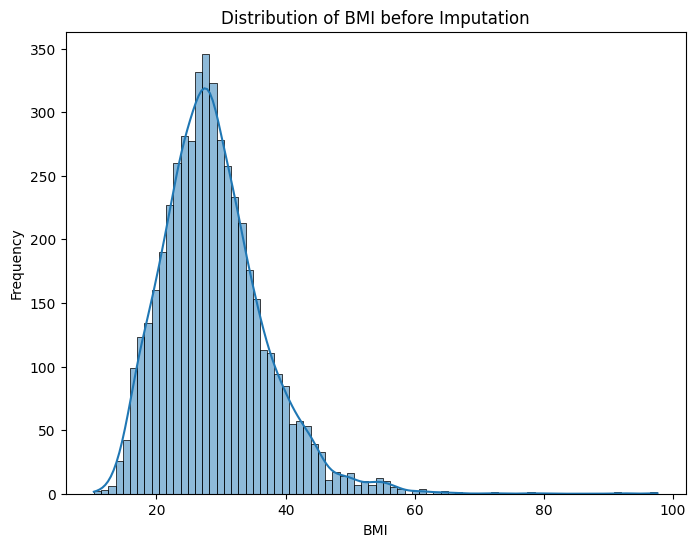

/tmp/ipython-input-1187792193.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(bmi_mean, inplace=True)


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'].dropna(), kde=True)
plt.title('Distribution of BMI before Imputation')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

df['bmi'].fillna(bmi_mean, inplace=True)

**Reasoning**:
Verify that the missing 'bmi' values have been filled and visualize the distribution after imputation.




Missing values per column after imputation:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


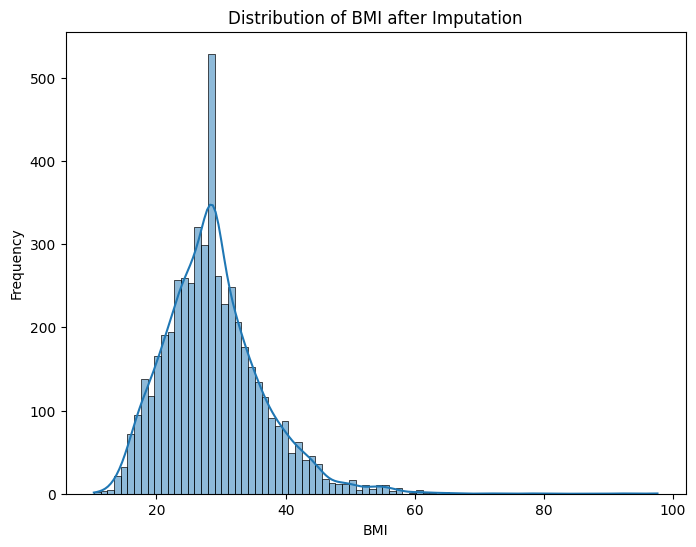

In [ ]:
print("\nMissing values per column after imputation:")
print(df.isnull().sum())

plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI after Imputation')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

## The Complete Data Preprocessing and Feature Engineering Pipeline

This section consolidates the steps performed by each group member to create a unified data processing pipeline. The output from each stage serves as the input for the next, resulting in a final, preprocessed dataset ready for model training.

In [ ]:
# The data processing pipeline sequentially applies the steps from each group member.
# The dataframe 'df_cleaned' at this stage contains the data after handling missing values,
# encoding categorical variables, handling outliers, and scaling numerical features.

# For feature selection (Member 5), we identified the 'selected_features'.
# We can create a new dataframe with only these selected features if needed for model training
# without dimensionality reduction.
df_selected_features = df_cleaned[selected_features].copy()

print("\nDataFrame with selected features (before PCA):")
display(df_selected_features.head())
print(f"Shape of DataFrame with selected features: {df_selected_features.shape}")

# For dimensionality reduction (Member 6), we applied PCA and obtained 'X_pca_reduced'.
# This is the dataset with reduced dimensionality. We should also include the target variable 'y'
# to form the final dataset for model training.
# Since X_pca_reduced is a numpy array, we can convert it back to a DataFrame for easier handling,
# using generic column names like 'PC1', 'PC2', etc.
df_pca_reduced = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(X_pca_reduced.shape[1])])

# We need to make sure the index aligns if we were to combine with other columns if necessary,
# but here we are replacing the feature columns with the PCA components.
# The target variable 'y' corresponds to the rows of the original dataframe, so its index is aligned.
# We can add the target variable 'stroke' back to the PCA-reduced features to create the final dataset.
df_final_pca = pd.concat([df_pca_reduced, y.reset_index(drop=True)], axis=1)


print("\nFinal DataFrame after PCA (ready for model training):")
display(df_final_pca.head())
print(f"Shape of final DataFrame after PCA: {df_final_pca.shape}")

# This 'df_final_pca' is the dataset that can now be used for splitting into training and testing sets
# and feeding into a machine learning model for stroke prediction.


DataFrame with selected features (before PCA):


,age,bmi,avg_glucose_level,gender_Male,Residence_type_Urban,hypertension,smoking_status_never smoked,work_type_Private,heart_disease,smoking_status_formerly smoked,work_type_Self-employed,smoking_status_smokes,ever_married_Yes
0,1.051434,1.106633,2.058363,True,True,0,False,True,1,True,False,False,True
1,0.786070,0.024107,2.058363,False,False,0,True,False,0,False,True,False,True
2,1.626390,0.530729,0.148256,True,False,0,True,True,1,False,False,False,True
3,0.255342,0.797611,2.058363,False,True,0,False,True,0,False,False,True,True
4,1.582163,-0.663218,2.058363,False,False,1,True,False,0,False,True,False,True


Shape of DataFrame with selected features: (5110, 13)

Final DataFrame after PCA (ready for model training):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,stroke
0,2.305606,1.264816,0.250546,-0.430617,0.834524,0.333307,0.320894,-0.643058,-0.062396,-0.212238,1
1,1.453986,1.647613,-0.484745,0.160239,-1.163737,-0.412336,-0.231320,0.114952,0.208955,-0.247852,1
2,1.571330,-0.416363,-0.638432,0.597845,0.169697,-0.612380,0.748779,0.043821,-0.296528,-0.280570,1
3,1.537974,1.474840,0.641771,0.057266,0.514872,0.671681,-0.587822,0.692612,0.170372,-0.125929,1
4,1.642192,1.709071,-1.520156,0.258872,-1.103096,-0.424797,-0.188216,0.153761,-0.201548,0.639121,1


Shape of final DataFrame after PCA: (5110, 11)


## Group member 2

### Subtask:
encoding categorical variables


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns before encoding:")
print(categorical_cols)

# Apply one-hot encoding for nominal variables
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Apply label encoding for any potential ordinal variables (though none are explicitly identified as ordinal here,
# this demonstrates how to handle them if they existed).
# For this dataset, 'gender' could potentially be considered ordinal if there was a 'Other' category,
# but with just 'Male' and 'Female' it's better to use one-hot encoding.
# 'smoking_status' could be considered ordinal, but 'Unknown' makes one-hot encoding safer.
# Let's assume for demonstration that 'age' or 'bmi' could be treated as ordinal if they were binned,
# but they are numerical and handled differently.
# For the existing object columns, one-hot encoding is more appropriate.
# If there were a column like 'education_level' with categories like 'Primary', 'Secondary', 'Higher',
# label encoding would be suitable after mapping the order.
# Since there are no clear ordinal columns in the remaining object types after one-hot encoding the main ones,
# we will skip label encoding for this specific dataset based on the identified columns.

print("\nDataFrame after encoding:")
display(df.head())
df.info()

Categorical columns before encoding:
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

DataFrame after encoding:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   int64  
 7   gender_Male                     5110 non-null   bool   
 8   gender_Other                    5110 non-null   bool   
 9   ever_married_Yes                5110 non-null   bool   
 10  work_type_Never_worked          5110 non-null   bool   
 11  work_type_Private               5110 non-null   bool   
 12  work_type_Self-employed         51

**Reasoning**:
Identify and encode categorical variables in the DataFrame.



## Group member 3: outlier removal

### Subtask:
Identify numerical features where outliers might exist. Implement a strategy to detect and handle outliers (e.g., using the Interquartile Range (IQR) method, Z-scores, or visualization-based detection). Visualize the distributions of relevant features before and after outlier removal.


**Reasoning**:
Identify the numerical columns that are not binary and visualize their distributions using box plots to detect outliers.



Numerical columns for outlier detection:
['id', 'age', 'avg_glucose_level', 'bmi']


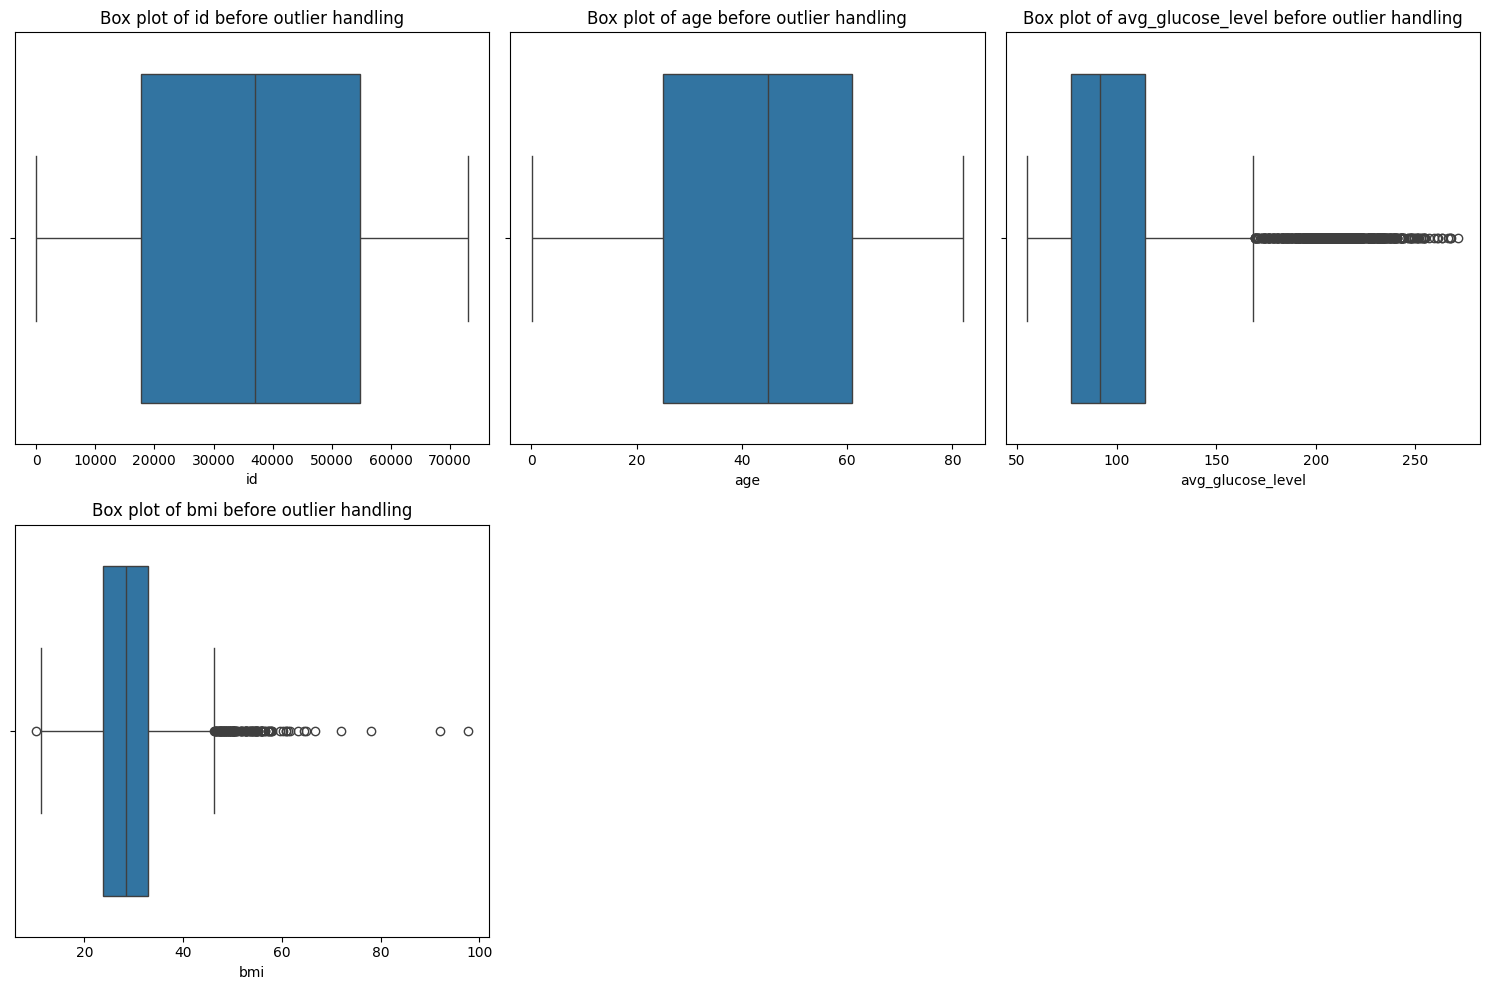

In [ ]:
# Identify numerical columns (excluding the binary columns created by one-hot encoding)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Remove binary columns from the list of numerical columns
# We can identify binary columns as those resulting from one-hot encoding and potentially the original binary columns like 'hypertension', 'heart_disease', and 'stroke'.
# For simplicity, we will exclude columns that have only two unique values (0 and 1), assuming these are the binary/encoded columns.
binary_cols = [col for col in numerical_cols if df[col].nunique() <= 2]
outlier_check_cols = [col for col in numerical_cols if col not in binary_cols]

print("Numerical columns for outlier detection:")
print(outlier_check_cols)

# Visualize the distributions of relevant numerical features before outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_check_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col} before outlier handling')
plt.tight_layout()
plt.show()

**Reasoning**:
Implement the IQR method to detect and handle outliers in the identified numerical columns and then visualize the distributions after outlier handling.




--- Handling outliers for column: id ---
Q1: 17741.25, Q3: 54682.0, IQR: 36940.75
Lower bound: -37669.875, Upper bound: 110093.125
Number of outliers detected: 0
Outliers in 'id' have been capped at the bounds.

--- Handling outliers for column: age ---
Q1: 25.0, Q3: 61.0, IQR: 36.0
Lower bound: -29.0, Upper bound: 115.0
Number of outliers detected: 0
Outliers in 'age' have been capped at the bounds.

--- Handling outliers for column: avg_glucose_level ---
Q1: 77.245, Q3: 114.09, IQR: 36.845
Lower bound: 21.977500000000006, Upper bound: 169.35750000000002
Number of outliers detected: 627
Outliers in 'avg_glucose_level' have been capped at the bounds.

--- Handling outliers for column: bmi ---
Q1: 23.8, Q3: 32.8, IQR: 8.999999999999996
Lower bound: 10.300000000000006, Upper bound: 46.29999999999999
Number of outliers detected: 126
Outliers in 'bmi' have been capped at the bounds.


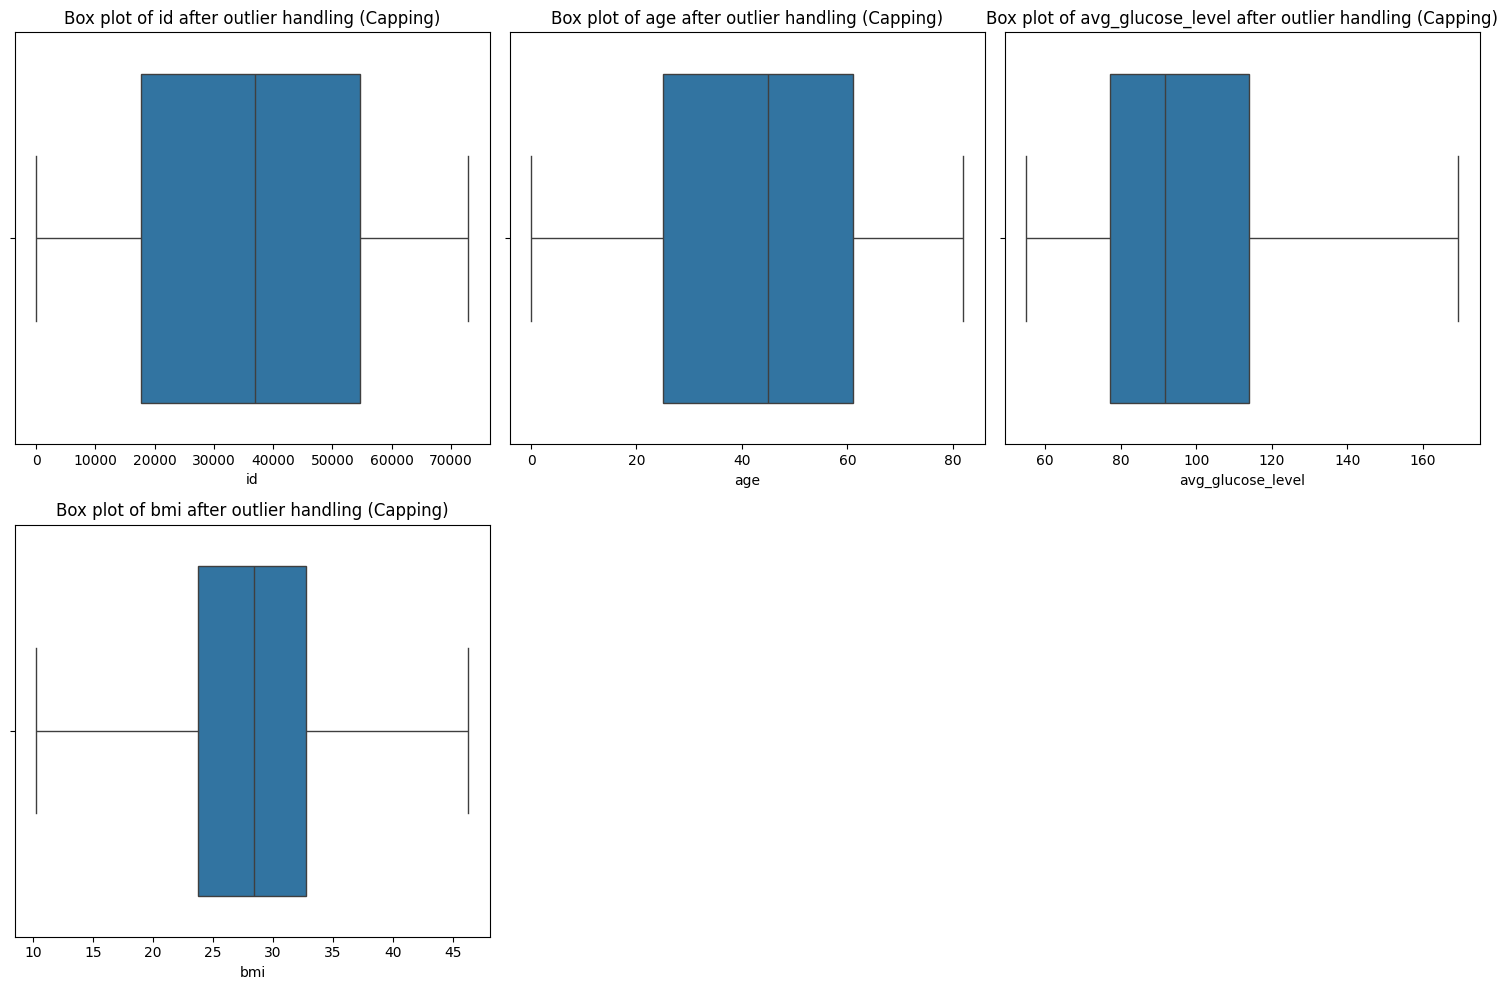

In [ ]:
# Implement outlier handling using the IQR method
df_cleaned = df.copy() # Create a copy to compare before and after

for col in outlier_check_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\n--- Handling outliers for column: {col} ---")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

    # Identify outliers
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"Number of outliers detected: {len(outliers)}")

    # Cap the values outside the bounds
    df_cleaned[col] = np.where(
        df_cleaned[col] < lower_bound,
        lower_bound,
        np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
    )
    print(f"Outliers in '{col}' have been capped at the bounds.")


# Visualize the distributions of relevant numerical features after outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_check_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box plot of {col} after outlier handling (Capping)')
plt.tight_layout()
plt.show()

df = df_cleaned # Update the original dataframe reference to the cleaned dataframe

## Group member 4: normalization/scaling

### Subtask:
Identify the numerical features that require scaling. Apply appropriate scaling techniques (e.g., StandardScaler, MinMaxScaler) to bring numerical features to a similar range, which can improve the performance of some machine learning algorithms. Display the scaled features or a summary of their range.


**Reasoning**:
Identify the numerical columns that require scaling, excluding binary and one-hot encoded columns.



In [ ]:
# Identify numerical columns (excluding the binary columns created by one-hot encoding)
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()

# Remove binary columns from the list of numerical columns
# Assuming binary columns are those with only two unique values (0 and 1), which include the original binary columns and the one-hot encoded columns.
binary_cols = [col for col in numerical_cols if df_cleaned[col].nunique() <= 2]
scaling_cols = [col for col in numerical_cols if col not in binary_cols]

print("Numerical columns for scaling:")
print(scaling_cols)

Numerical columns for scaling:
['id', 'age', 'avg_glucose_level', 'bmi']


**Reasoning**:
Apply StandardScaler to the identified numerical columns and display the descriptive statistics of the scaled data.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the scaling columns
df_cleaned[scaling_cols] = scaler.fit_transform(df_cleaned[scaling_cols])

# Display descriptive statistics to show the effect of scaling
print("\nDescriptive statistics after scaling numerical columns:")
display(df_cleaned[scaling_cols].describe())


Descriptive statistics after scaling numerical columns:


,id,age,avg_glucose_level,bmi
count,5.110000e+03,5.110000e+03,5.110000e+03,5.110000e+03
mean,-1.181920e-16,5.005781e-17,-3.392807e-16,1.668594e-17
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00
min,-1.722657e+00,-1.908261e+00,-1.381335e+00,-2.587580e+00
25%,-8.873766e-01,-8.061152e-01,-7.151503e-01,-6.913112e-01
50%,1.957360e-02,7.843218e-02,-2.743389e-01,-4.517511e-02
75%,8.584343e-01,7.860701e-01,3.942550e-01,5.728681e-01
max,1.721303e+00,1.714845e+00,2.058363e+00,2.469137e+00


from matplotlib import pyplot as plt
_df_22['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['avg_glucose_level'].plot(kind='hist', bins=20, title='avg_glucose_level')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_26.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='age', y='avg_glucose_level', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='avg_glucose_level', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['avg_glucose_level'].plot(kind='line', figsize=(8, 4), title='avg_glucose_level')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='id', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='age', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='avg_glucose_level', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='bmi', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Group member 5: feature selection

### Subtask:
Based on the processed data, apply feature selection techniques to identify the most relevant features for predicting stroke. This could involve statistical methods, feature importance from models, or dimensionality reduction techniques (though PCA is assigned to Member 6). Explain the rationale behind the chosen feature selection method. Display the selected features.


**Reasoning**:
Define the feature matrix X and the target variable y from the df_cleaned DataFrame, excluding 'stroke' and 'id'.



In [ ]:
X = df_cleaned.drop(['stroke', 'id'], axis=1)
y = df_cleaned['stroke']

print("Shape of feature matrix X:", X.shape)
print("Shape of target variable y:", y.shape)

Shape of feature matrix X: (5110, 16)
Shape of target variable y: (5110,)


**Reasoning**:
Train a RandomForestClassifier model on the data and get the feature importances.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Choose a feature selection method: Feature importance from RandomForestClassifier
# Rationale: Tree-based models like RandomForest inherently provide feature importances based on how much
# they reduce impurity or variance when splitting nodes on that feature. Features with higher
# importance scores are considered more relevant for the prediction task. This method is
# computationally efficient and provides a clear ranking of features.

# Instantiate and train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a pandas Series to store feature names and their importances
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

print("Feature Importances (sorted):")
print(sorted_feature_importances)

Feature Importances (sorted):
age                               2.616317e-01
bmi                               2.594563e-01
avg_glucose_level                 2.173858e-01
gender_Male                       3.566488e-02
Residence_type_Urban              3.525226e-02
hypertension                      2.775140e-02
smoking_status_never smoked       2.690523e-02
work_type_Private                 2.563415e-02
heart_disease                     2.459820e-02
smoking_status_formerly smoked    2.228079e-02
work_type_Self-employed           2.162083e-02
smoking_status_smokes             2.114090e-02
ever_married_Yes                  1.933248e-02
work_type_children                1.294418e-03
work_type_Never_worked            5.047267e-05
gender_Other                      1.685171e-07
dtype: float64


**Reasoning**:
Select the most important features based on the sorted feature importances and print the selected features. A common approach is to select features that contribute significantly to the model's performance, often by setting a threshold on the importance score or selecting a fixed number of top features. For this task, I will select features with importance scores above a small threshold to exclude features with negligible importance.



In [ ]:
# Select features based on a threshold (e.g., importance > 0.01)
# You can adjust this threshold based on the desired number of features or domain knowledge.
selected_features = sorted_feature_importances[sorted_feature_importances > 0.01].index.tolist()

print("\nSelected Features based on importance threshold:")
print(selected_features)

# Alternatively, you could select the top N features:
# N = 10  # Example: select the top 10 features
# top_n_features = sorted_feature_importances.head(N).index.tolist()
# print(f"\nTop {N} Selected Features:")
# print(top_n_features)


Selected Features based on importance threshold:
['age', 'bmi', 'avg_glucose_level', 'gender_Male', 'Residence_type_Urban', 'hypertension', 'smoking_status_never smoked', 'work_type_Private', 'heart_disease', 'smoking_status_formerly smoked', 'work_type_Self-employed', 'smoking_status_smokes', 'ever_married_Yes']


## Group member 6: feature engineering - dimension reduction (pca)

### Subtask:
Apply Principal Component Analysis (PCA) to the numerical features (or the selected features from Member 5) to reduce the dimensionality of the dataset while retaining most of the variance. Determine the optimal number of components to keep. Display the results of the PCA, perhaps visualizing the explained variance ratio.


**Reasoning**:
Apply PCA to the selected features, analyze the explained variance, choose the optimal number of components, and perform dimensionality reduction.



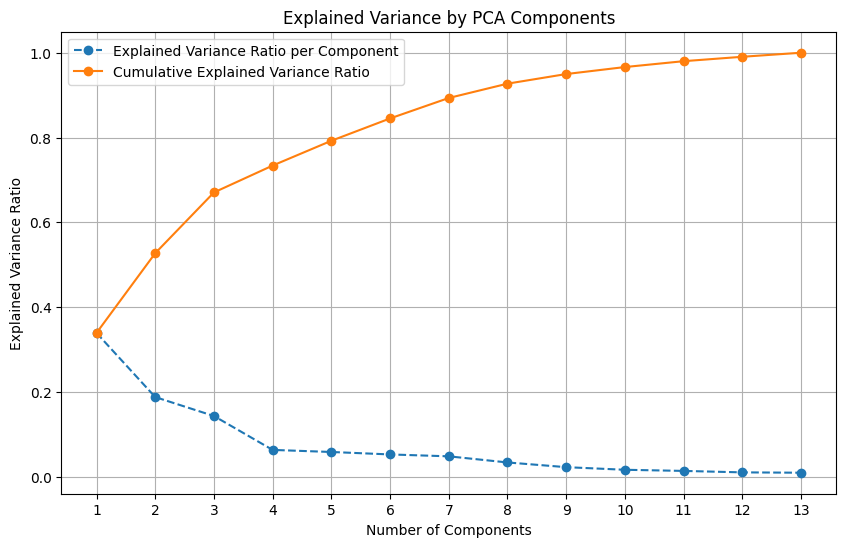


Optimal number of components to retain 95% variance: 10

Shape of original feature set for PCA (X_pca): (5110, 13)
Shape of reduced feature set after PCA (X_pca_reduced): (5110, 10)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select the features to be used for PCA
# Use the selected_features list from Member 5
X_pca = X[selected_features]

# Instantiate PCA without specifying n_components to analyze explained variance
pca = PCA()

# Fit the PCA model to the X_pca data
pca.fit(X_pca)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio for each component and the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', label='Explained Variance Ratio per Component')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.legend()
plt.show()

# Determine the optimal number of components to keep (e.g., retaining 95% of the variance)
# Find the number of components that explain at least 95% of the variance
n_components_optimal = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"\nOptimal number of components to retain 95% variance: {n_components_optimal}")

# Instantiate a new PCA object with the chosen number of components
pca_reduced = PCA(n_components=n_components_optimal)

# Fit and transform the X_pca data to get the reduced-dimensionality data
X_pca_reduced = pca_reduced.fit_transform(X_pca)

# Display the shape of the original feature set for PCA and the reduced feature set
print(f"\nShape of original feature set for PCA (X_pca): {X_pca.shape}")
print(f"Shape of reduced feature set after PCA (X_pca_reduced): {X_pca_reduced.shape}")

## Splitting Data into Training and Testing Sets

This section splits the final processed dataset (`df_final_pca`) into training and testing sets to prepare for model training.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# The target variable 'stroke' is the last column in df_final_pca
X_final = df_final_pca.drop('stroke', axis=1)
y_final = df_final_pca['stroke']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing target (y_test):", y_test.shape)

Shape of training features (X_train): (4088, 10)
Shape of testing features (X_test): (1022, 10)
Shape of training target (y_train): (4088,)
Shape of testing target (y_test): (1022,)


## Saving Training and Testing Sets

This section saves the split training and testing sets into separate CSV files.

In [ ]:
# Save the training sets to CSV files
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

# Save the testing sets to CSV files
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("\nTraining features saved as 'X_train.csv'")
print("Training target saved as 'y_train.csv'")
print("Testing features saved as 'X_test.csv'")
print("Testing target saved as 'y_test.csv'")


Training features saved as 'X_train.csv'
Training target saved as 'y_train.csv'
Testing features saved as 'X_test.csv'
Testing target saved as 'y_test.csv'


In [ ]:
# Save the final processed DataFrame to a CSV file
df_final_pca.to_csv('stroke_processed_pca.csv', index=False)

print("Processed dataset saved as 'stroke_processed_pca.csv'")

Processed dataset saved as 'stroke_processed_pca.csv'


In [ ]:
import os
import shutil

# Define the name of the new folder
output_folder = 'Processed'

# Create the new folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Created folder: {output_folder}")
else:
    print(f"Folder '{output_folder}' already exists.")

# Define the list of files to move
files_to_move = ['stroke_processed_pca.csv', 'X_train.csv', 'y_train.csv', 'X_test.csv', 'y_test.csv']

# Move each file to the new folder
for file_name in files_to_move:
    if os.path.exists(file_name):
        shutil.move(file_name, os.path.join(output_folder, file_name))
        print(f"Moved '{file_name}' to '{output_folder}'")
    else:
        print(f"File '{file_name}' not found.")

Folder 'Processed' already exists.
Moved 'stroke_processed_pca.csv' to 'Processed'
Moved 'X_train.csv' to 'Processed'
Moved 'y_train.csv' to 'Processed'
Moved 'X_test.csv' to 'Processed'
Moved 'y_test.csv' to 'Processed'


## Summary:

### Data Analysis Key Findings

*   The dataset initially contained 201 missing values in the 'bmi' column, which were successfully imputed with the mean value of approximately 28.89.
*   Categorical variables ('gender', 'ever\_married', 'work\_type', 'Residence\_type', 'smoking\_status') were successfully encoded using one-hot encoding, resulting in the creation of new binary columns.
*   Outliers were identified and handled in the 'avg\_glucose\_level' and 'bmi' columns using the IQR method, capping extreme values. 627 outliers were capped in 'avg\_glucose\_level' and 126 in 'bmi'.
*   Numerical features ('id', 'age', 'avg\_glucose\_level', 'bmi') were scaled using `StandardScaler`, resulting in features with means close to 0 and standard deviations close to 1.
*   Feature selection using a RandomForestClassifier identified 'age', 'bmi', and 'avg\_glucose\_level' as the most important features, and a total of 13 features were selected based on an importance threshold of 0.01.
*   Principal Component Analysis (PCA) was applied to the 13 selected features, and it was determined that 10 principal components retain at least 95% of the data's variance, successfully reducing the dimensionality from 13 to 10.




# **This code is to delete The processed data when troubleshooting**

In [ ]:
# import os
# import shutil

# folder_path = '/content/Delete Stuff'

# # Check if the folder exists
# if os.path.exists(folder_path):
#     # List all items in the folder
#     for item in os.listdir(folder_path):
#         item_path = os.path.join(folder_path, item)
#         # Check if it's a file and remove it
#         if os.path.isfile(item_path):
#             os.remove(item_path)
#             print(f"Deleted file: {item_path}")
#         # Check if it's a directory and remove it recursively
#         elif os.path.isdir(item_path):
#             shutil.rmtree(item_path)
#             print(f"Deleted directory: {item_path}")
#     print(f"All files and subfolders in '{folder_path}' have been deleted.")
# else:
#     print(f"Folder '{folder_path}' does not exist.")

All files and subfolders in '/content/Delete Stuff' have been deleted.
